# Discovering Periodic Frequent patterns in Big Data Using EPCPGrowth Algorithm

In this tutorial, we will discuss the first approach to find Correlated Periodic Frequent patterns in big data using EPCPGrowth algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Periodic Frequent patterns using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing EPCPGrowth on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the EPCPGrowth algorithm

In [1]:
from PAMI.periodicCorrelatedPattern.basic import EPCPGrowth  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'

minimumSupportCount = 100  #Users can also specify this constraint between 0 to 1.
maximumPeriodCount = 8000
minAllConfCount = 0.5
maxPerAllmaxPerConfCount = 4.0
seperator = '\t'       

#### Step 3: Execute the EPCPGrowth algorithm

In [3]:
obj = alg.EPCPGrowth(iFile=inputFile, minSup=minimumSupportCount,minAllConf=minAllConfCount,maxPer=maximumPeriodCount,maxPerAllConf=maxPerAllmaxPerConfCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Correlated Periodic-Frequent patterns were generated successfully using EPCPGrowth algorithm 


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='periodicFrequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
periodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(periodicFrequentPatternsDF)))

Total No of patterns: 843


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 15.619414567947388


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 573644800
Memory (USS): 535248896


# Advanced Tutorial on Implementing EPCPGrowth Algorithm

In this tutorial, we will discuss the first approach to find Correlated Periodic Frequent patterns in big data using EPCPGrowth algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Correlated Periodic Frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the EPCPGrowth algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the EPCPGrowth algorithm and pandas data frame

In [1]:
from PAMI.periodicCorrelatedPattern.basic import EPCPGrowth  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator = '\t'
maxmunPeriodCount = 5000
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
minAllConfCount = 0.5
maxPerAllmaxPerConfCount = 6.5
result = pd.DataFrame(columns=['algorithm', 'minSup','minAllConf','maxPer','maxPerAllConf', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of EPCPGrowth algorithm

#### Step 3: Execute the EPCPGrowth algorithm using a for loop

In [3]:
algorithm = 'EPCPGrowth'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.EPCPGrowth('https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv', minSup=minSupCount,minAllConf=minAllConfCount,maxPer=maxmunPeriodCount,maxPerAllConf=maxPerAllmaxPerConfCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,minAllConfCount,maxmunPeriodCount, maxPerAllmaxPerConfCount,len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Correlated Periodic-Frequent patterns were generated successfully using EPCPGrowth algorithm 
Correlated Periodic-Frequent patterns were generated successfully using EPCPGrowth algorithm 
Correlated Periodic-Frequent patterns were generated successfully using EPCPGrowth algorithm 
Correlated Periodic-Frequent patterns were generated successfully using EPCPGrowth algorithm 
Correlated Periodic-Frequent patterns were generated successfully using EPCPGrowth algorithm 


In [4]:
print(result)

    algorithm  minSup  minAllConf  maxPer  maxPerAllConf  patterns    runtime  \
0  EPCPGrowth     100         0.5    5000            6.5       834  15.714894   
1  EPCPGrowth     150         0.5    5000            6.5       808  14.021492   
2  EPCPGrowth     200         0.5    5000            6.5       782  14.483279   
3  EPCPGrowth     250         0.5    5000            6.5       753  12.575437   
4  EPCPGrowth     300         0.5    5000            6.5       723  13.929345   

      memory  
0  573054976  
1  572264448  
2  570396672  
3  568107008  
4  564613120  


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

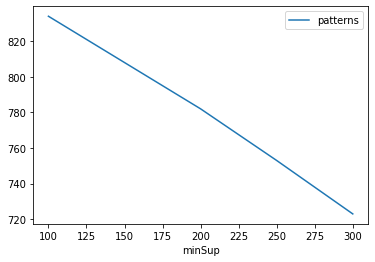

Graph for No Of Patterns is successfully generated!


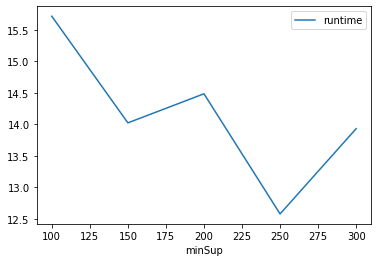

Graph for Runtime taken is successfully generated!


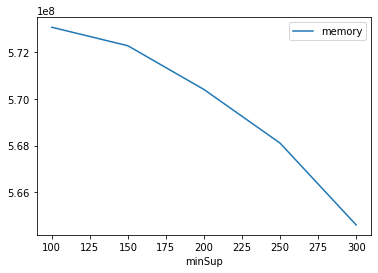

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
